# Analysis RRT

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Preparation of the information

In [44]:
pose = {1: "Up pose", 2: "Lateral non-front pose", 3: "Lateral front pose"}

df = pd.read_csv("../../results/rrt.csv", index_col=False)
df["totalTime"] = df["time1"] + df["time2"]
df["totalTimePrun"] = df["time1prun"] + df["time2prun"]
df["pickPose"] = df["pickPose"].astype(int)

df1 = df.loc[df.loc[:,"pickPose"] == 1,(df.columns != "pickPose")]
df2 = df.loc[df.loc[:,"pickPose"] == 2,:]
df3 = df.loc[df.loc[:,"pickPose"] == 3,:]
dfList = [df1, df2, df3]


df.dtypes

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

## Pre-analysis

                  time1     time2  time1prun  time2prun     size1     size2  \
time1          1.000000  0.869274   0.932029   0.902157  0.929864  0.894122   
time2          0.869274  1.000000   0.869894   0.913309  0.872901  0.914942   
time1prun      0.932029  0.869894   1.000000   0.926917  0.997800  0.921662   
time2prun      0.902157  0.913309   0.926917   1.000000  0.929333  0.996440   
size1          0.929864  0.872901   0.997800   0.929333  1.000000  0.926120   
size2          0.894122  0.914942   0.921662   0.996440  0.926120  1.000000   
size1prun      0.557338  0.531935   0.565858   0.557229  0.585651  0.555190   
size2prun      0.457576  0.522621   0.452810   0.511755  0.459597  0.542779   
totalTime      0.961434  0.971708   0.929303   0.939186  0.929942  0.936255   
totalTimePrun  0.930158  0.912358   0.972549   0.988796  0.973172  0.984498   

               size1prun  size2prun  totalTime  totalTimePrun  
time1           0.557338   0.457576   0.961434       0.930158  
ti

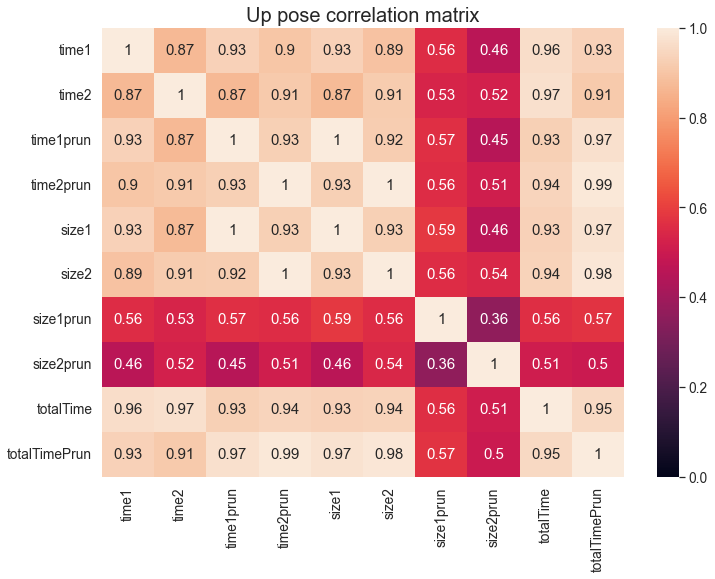

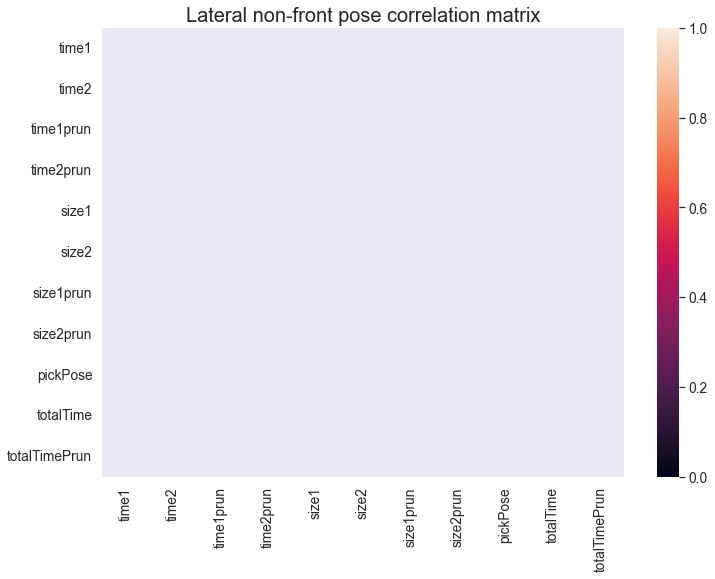

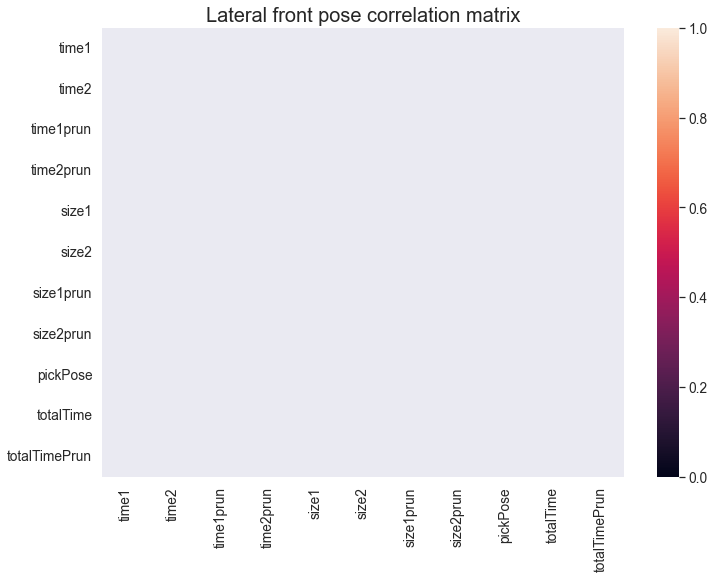

In [48]:
for i,data in enumerate(dfList):
    sns.set(rc={'figure.figsize':(11.7,8.27)})

    corr = data.loc[:, data.columns != "extend"].corr(method="pearson")
    print(corr)
    
    plt.figure()
    sns.set(font_scale = 1.25)
    fig = sns.heatmap(corr, vmin=0, vmax=1, annot=True)
    fig.axes.set_title(pose[i+1] + " correlation matrix", fontsize = 20)
    
    data.describe()

## Plots of descriptive analysis
Plots will be performed based on the extend parameter and compared variable to variable.

### Boxplots compared for extend for each of the variables

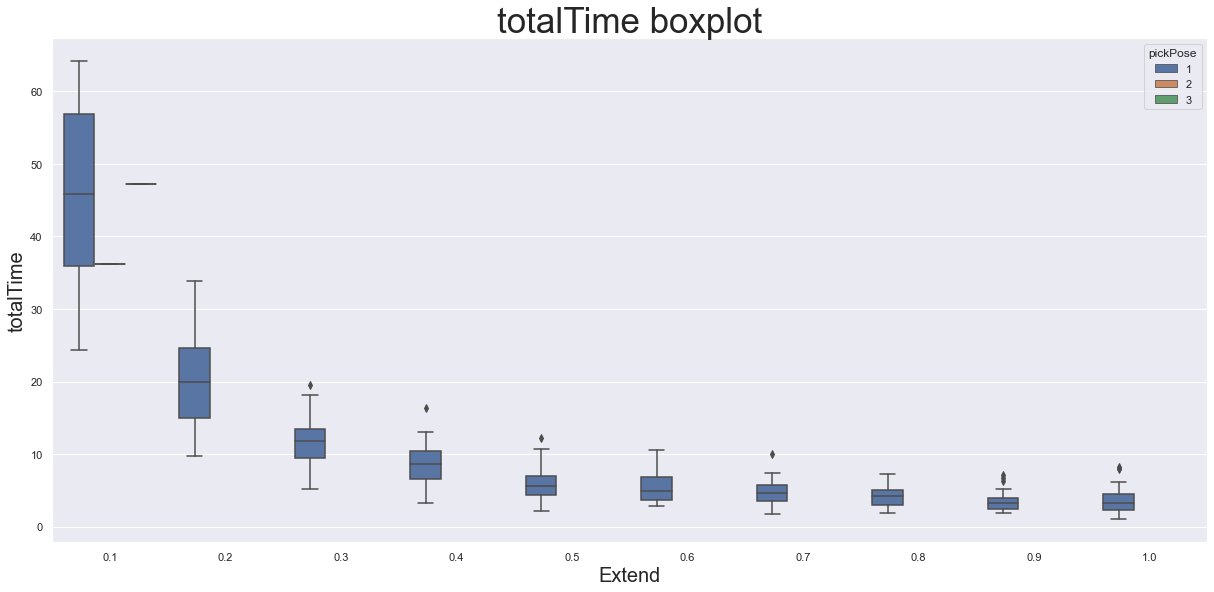

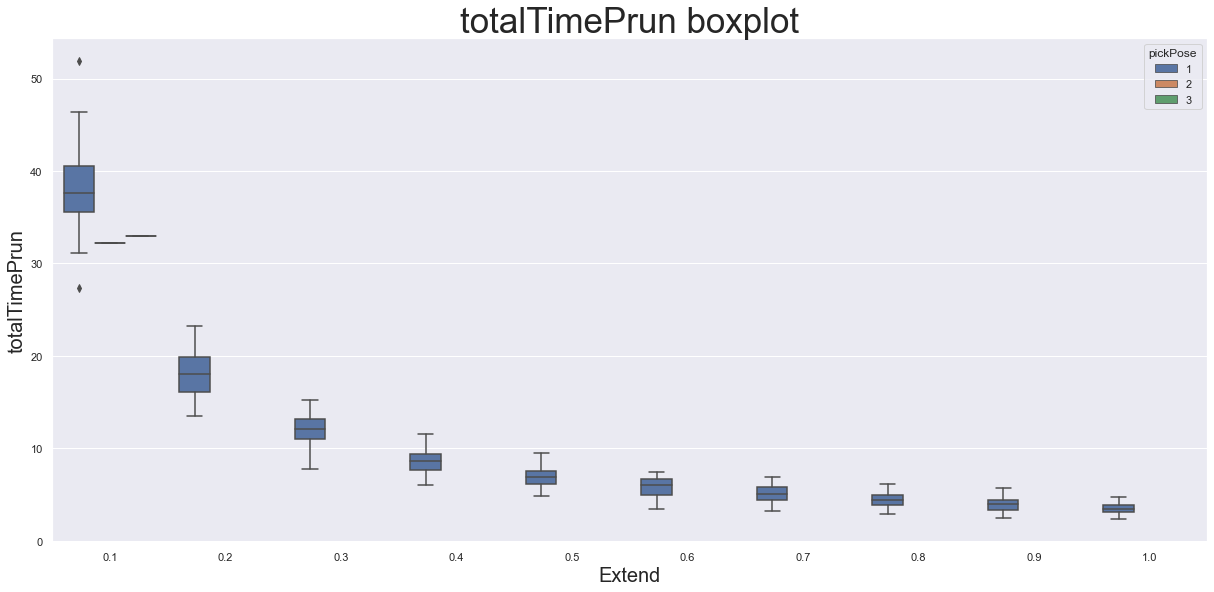

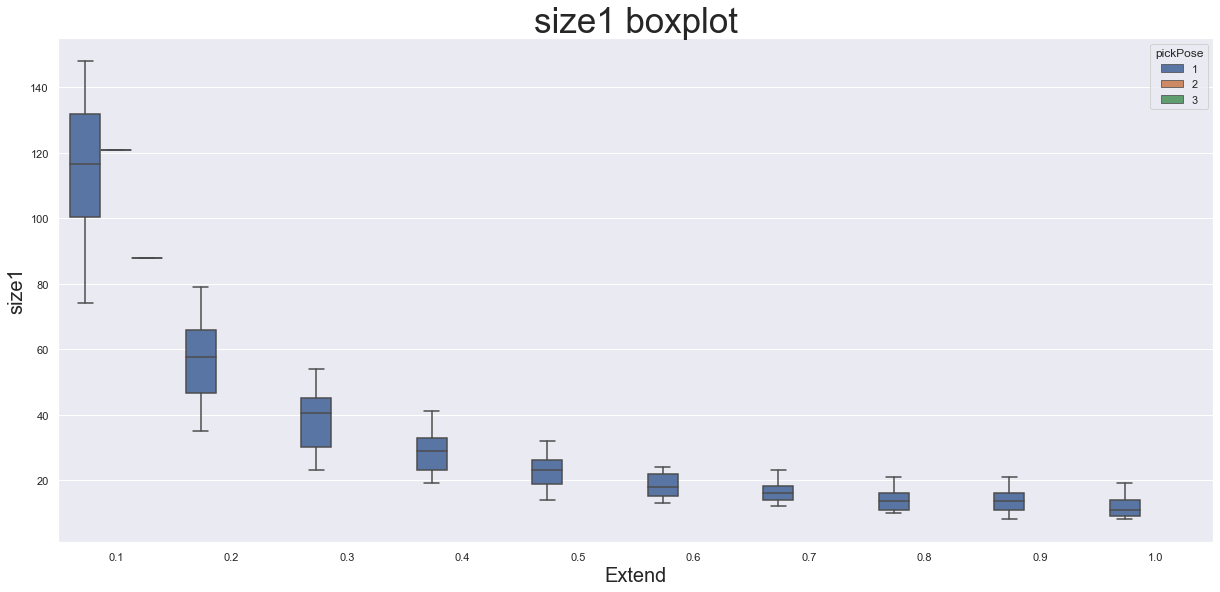

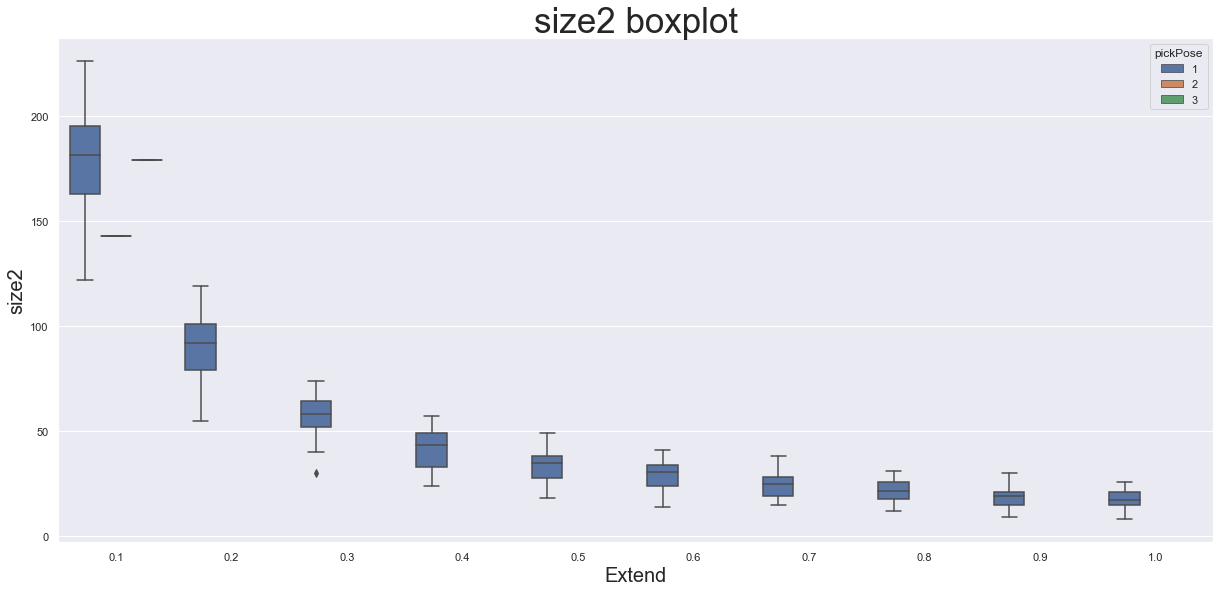

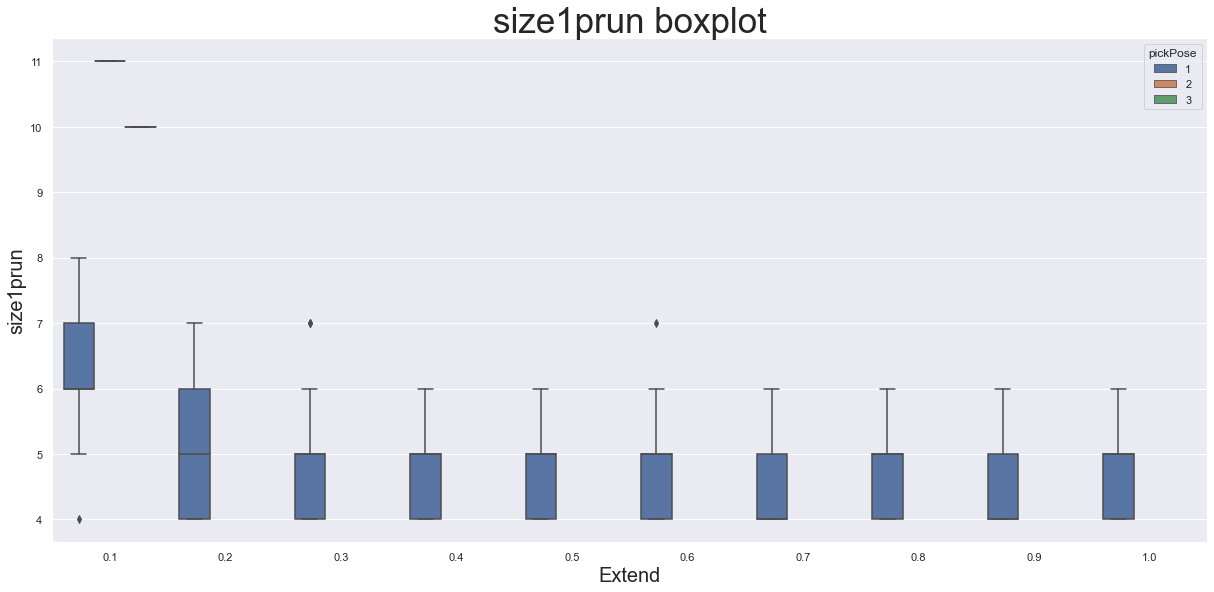

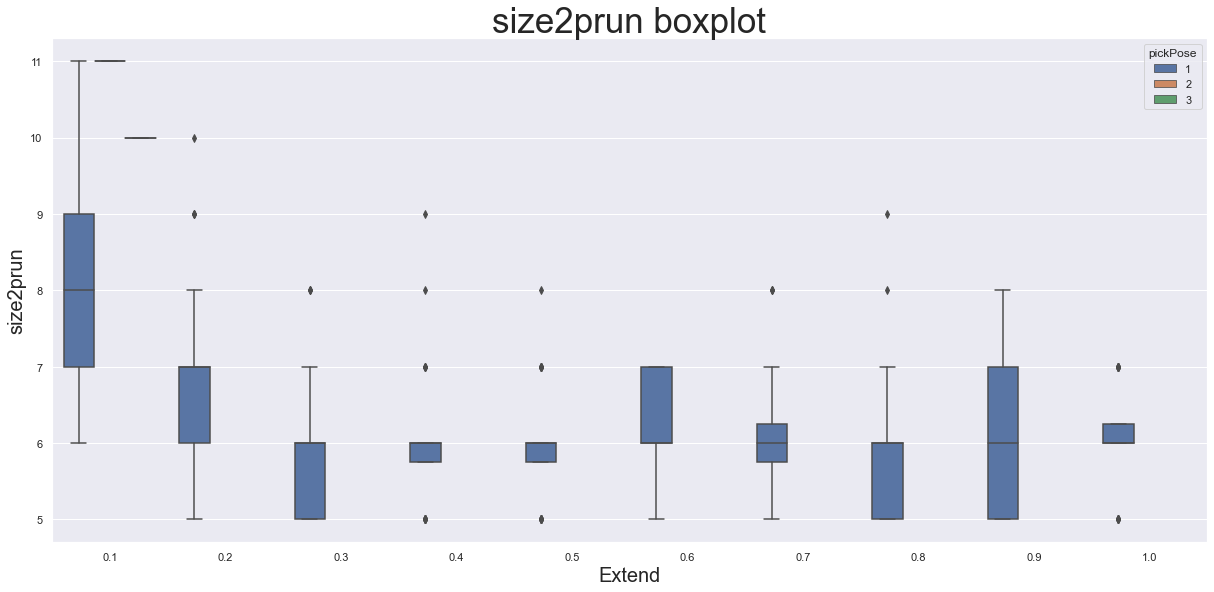

In [49]:
dataCols = ["totalTime","totalTimePrun","size1","size2","size1prun","size2prun"]

sns.set(rc={'figure.figsize':(20.7,9.27)})
for col in dataCols:
    data = df.loc[:,[col, "extend"]]
    plt.figure()
    fig = sns.boxplot(x = "extend", y = col, hue="pickPose", data=df)
    plt.xlabel("Extend", size=20)
    plt.ylabel(col, size=20)
    plt.title(col + " boxplot", size = 35)
    plt.savefig("../../results/figures/"+col+".png")